<a href="https://colab.research.google.com/github/Tirth2004-git/diabetes_prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name : Oza Tirth Nareshbhai**
# **Div : 5IT - A**
# **Enrollment : 2303031080006**

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [147]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [148]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [150]:
df.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

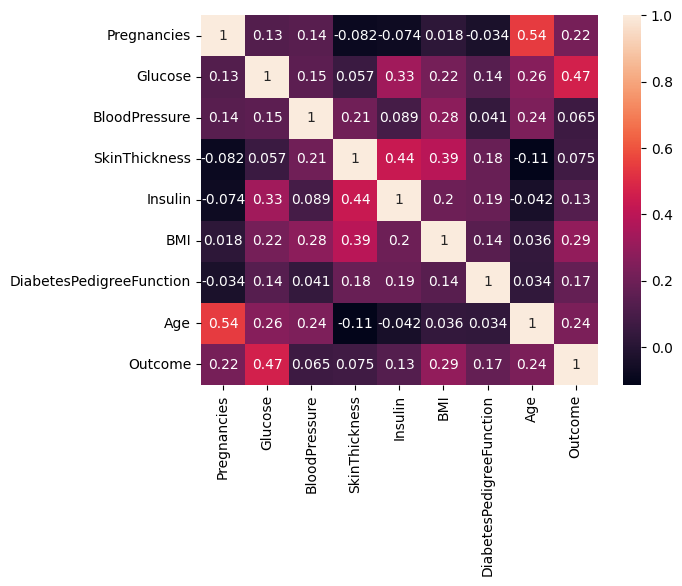

In [151]:
sns.heatmap(df.corr() , annot=True)

In [152]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [153]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']

for col in cols:
  df[col] = pd.to_numeric(df[col], errors='coerce')
  df[col] = df[col].replace(0 , np.nan)
  df[col].fillna(df[col].median() , inplace=True)


df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [154]:
(df==0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


<Axes: >

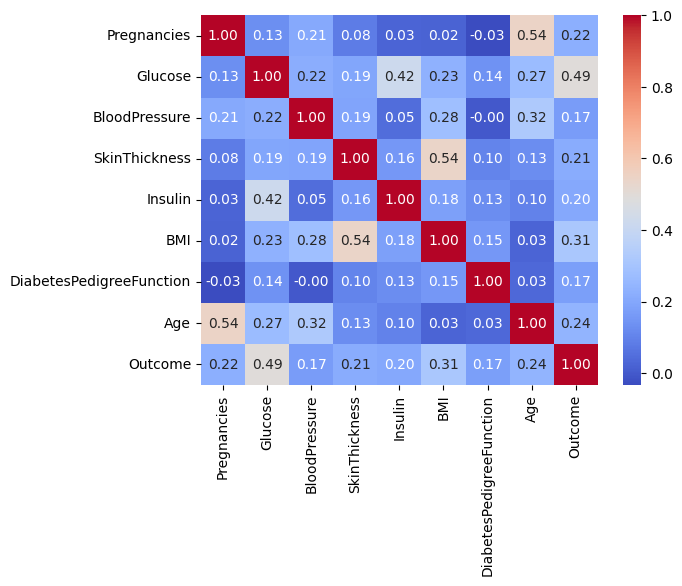

In [155]:
sns.heatmap(df.corr() , annot=True,cmap='coolwarm',fmt='.2f')

<Axes: >

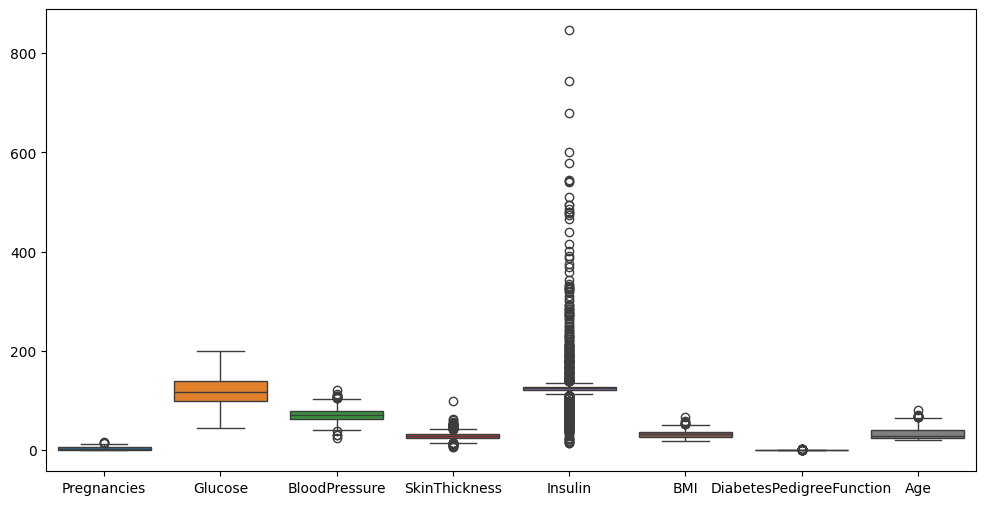

In [156]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop('Outcome' , axis=1))

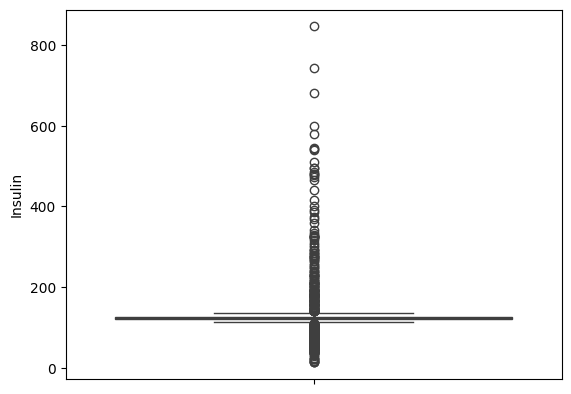

In [157]:
sns.boxplot(y=df['Insulin'])
plt.show()

In [162]:
from sklearn.model_selection import train_test_split

x = df.drop('Outcome' , axis=1)
y = df['Outcome']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model = {
    'LogisticRegression' : LogisticRegression() ,
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "SVC" : SVC(),
    "KNeighborsClassifier" : KNeighborsClassifier()
}


for name , model in model.items():
   model.fit(x_train , y_train)
   print(f'{name} accuracy : {model.score(x_test , y_test)}')

LogisticRegression accuracy : 0.7727272727272727
DecisionTreeClassifier accuracy : 0.6883116883116883
RandomForestClassifier accuracy : 0.7467532467532467
SVC accuracy : 0.7662337662337663
KNeighborsClassifier accuracy : 0.6753246753246753


In [167]:
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score

y_pred = model.predict(x_test)
conf = confusion_matrix(y_test , y_pred)
print(conf)

[[70 29]
 [21 34]]


In [165]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



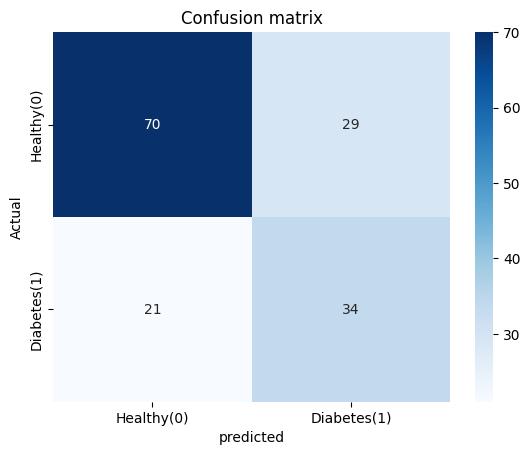

In [170]:
cm = conf
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues' , xticklabels=['Healthy(0)','Diabetes(1)'] , yticklabels=['Healthy(0)','Diabetes(1)'])
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()